# Chapter 19 - Classification Models and Evaluation

In the last chapter, we introduced the approach to directly minimize a loss function in a continuous model. 
In this chapter we will apply this method to classification with some adaptations and also alternative approaches. 

## Classification and Probabilities

The main difference between classification and regression is that in regression the target values are continuous, while in classification the values are categorical. 
The metric we have used in chapters 16 and 17 for classification was accuracy, i.e. the proportion of correctly classified items in a dataset. 
However, accuracy is a discrete function (based on binary input of classification success). 
Optimization methods using gradients (like linear regression or gradient descent) need continuous functions and cannot directly be applied.  
A way to avoid this problem and also gain a richer representation of the classifiers output is to predict probabilities. 
we have actually done this already in the logistic regression example. 

Using regression analysis helps 

We will leave the details of the optimization aside mostly, there are many excellent textbooks that address the mathematical and computational details, e.g. <mark>add list of references here</mark>. Instead we will focus on how to use these models.  

### Logistic Regression and Cross-Entropy

Binary logistic regression was defined in chapter 13 through this link function:
$$ \pi(x) = \sigma(a) = \frac{e^{a}}{1+e^{a}} = \frac{1}{1+e^{-x}}, $$
where $\pi$ is the **probability of success** (i.e. class 1) and $\sigma$ is called the **logistic function**, and $a = \mathbf{w}^\top \mathbf{x}$. 
The logistic function is useful for probabilities, as it has a range of $]0,1[$. As discussed in chapter 13, $a$ represents the **log-odds**. They are often called **logits** in machine learning. 

For a maximum likelihood estimate of the model, we view the class labels $y_k$ as 1 and 0 probabilities of success, as we assume them to be correct. The likelihood of our data $\pi(\mathbf{X})$ is then 
$$\mathcal{L} = \prod_k \pi(\mathbf{x_k}) y_k + (1-\pi(\mathbf{x_k}) (1-y_k).$$ 
In this expression, one summation element is always zero; which one depends on whether the true class $y_k$ is 1 or 0. 
The negative log likelihood is then $$ NLL = - \sum \log(\pi(\mathbf{x_k})) y_k + \log(1-\pi(\mathbf{x_k}) (1-y_k),$$.  
The elements of the summation are called the **cross-entropy** of the prediction $\pi(x)$ with respect to the true value $y_k$, also written as 
$H(y,\pi(\mathbf{x_k})) = - \log(\pi(\mathbf{x_k})) y_k + \log(1-\pi(\mathbf{x_k}) (1-y_k)$.

Therefore, miniziming the cross-entropy maximises the probability of our predictions. Since the all the involved functions are differentiable, we can directly optimise the parameters. In general, there are no closed form solutions for this problem, but many different algorithms that use different gradient-based methods, including stochastic gradient descent that we used in the previous chapter. For a more detailed discussion, see <mark>add Murphy and Hastie references</mark>. 


### From Logistic Regression to Neural Networks

We can extend the logistic regression model by replacing $a = \mathbf{w}^\top \mathbf{x} = \sum_d w_d x_d $ 
with $ a = \sigma( \sum_k w2_k b_k $ ), where with $ b_k = f( \sum_d w1_{kd} x_d )$, similar to the regression MLP in the last chapter.  
This is again a neural network with one input layer (the $x_d$), one hidden layer (the $b_k$) and one output neuron. 
The activation function $f$ can be a sigmoid function, which would make all neurons use the same activation function, but that is not required, other non-linear continuous functions are also possible and are used in practice. 
The only general difference of a classification MLP, compared to the regression MLP used in the last chapter, is that the final output is processed by a sigmoid function and that we are using cross-entropy as our loss function.


### Multi-Class Classification 

The forumlation above assumes that there are only two classes (success or not). 
For multiple classes we need cannot predict the probability of one class $\pi$ and calculate the other class probability as $1-\pi$, because there are multiple other classes. 
There are different approaches that can be taken, such as trainig one classifier per class, but the most common one for neural networks is to use a softmax function, which is similar to the logistic function, but extended to multiple classes.
For logistic regression, this setup is called multinomial logistic regression. 
The central element is to have a **logit** (**log-odds**) value $a_m$ for every class $m$.
For each logit, we take the exponential and then normalize so that all expoentitals add up to 1, to form a proability distribution:
$$P(y_m=1) = \frac{e^{{\boldsymbol w2_m}^\top \mathbf{x}}}{\sum_k e^{{\boldsymbol w2_k}^\top \mathbf{x}}},$$ 
where the label $\mathbf{y}$ is a one-hot encoded vector, i.e. all elements are $0$ except for element $m$ to indicated class $m$.  
This function is called the **softmax** and it is calcuated for each class $m$ to yield the class probabilitiy vector $\pi(\mathbf{x})$. 
The related loss function is the cross entropy,but formulated for arbitrary class numbers:
$ H(y,\pi(\mathbf{x})) = - \sum_m \log(P(\mathbf{x})) y_m$.
Since all elements $y_m$ are $0$ except for the true class $m$, the cross-entropy is the negative predicted  probability of the true class. 

### Alternative Approach

Althoug numeric optimization of parameters in a continuous model is the most popular approach in machine learning, there are alternatives. 

#### Generative Models - Naive Bayes 

Naive Bayes classification is a popular classifier, because the idea behind it is straightforward and it is computationally efficient. 
The general idea is to take the distribution of the features given the classes in the training data to infer the  probability of the classes given the features. 
This is achieved using Bayes' theorem, which is in general stated as 
$$ P(A|B) = \frac{P(B|A)P(A)}{P(B)}.$$
In our case, $A$ is class value and $B$ the feature vector.  

$P(A)$ be obtained by counting the class labels and estimating the distribution. 
The values of $P(B)$ are typically more difficult to estimate, as there are usually many more possible feature value combinations than data points. 
Fortunately, the value of $P(B)$ is not required since it is independent of the class A. 
Therefore we can just calculate the numberators and then normalize so that they add up to 1, as is required for a probability distribution.
The value of $P(B|A)$ is the most difficult part, as  
even in the simplest case of discrete features, there are typcially many more possible values of $A$ and $B$ than we have data points. 
We can work around that problem by making the assmption that gave the method ist name: we assume that the elements $B_d$ of $\mathbf{B}$ are independently distributed, so that $P(B|A) = \prod_d P(B_d|A)$. 
This makes the estimation pracitcal as there are typically enough datapoints to estimate of $P(B_d|A)$, i.e. the distribution of each feature dimension individually per class. 
This independence assumption is called *naive*, because it is typically not true or uncertain. 
In practice it has bowever been observed that naive Bayes classification produced good results even if there are dependencies in the distribution of the $P(B_d|A)$. 

The estimation of the $P(B_d|A)$ can be just relative frequencies for categorical features. 
In that case, Lagrangian smoothing is often used, which means that we add one to the observation count of every category, to avoid probability values of 0. 
For continuous valued features, we need to estimate a continuous distribution, e.g. Gaussian or Bernoulli.

### Comparing Different Classifiers

Let's try out a few of the classifiers that we have discussed on a somewhat larger dataset. 
This dataset contains grayscale images of faces of 40 people. 
The each image has has 64  x 64 pixels, with values in the range $[0,1]$. 
There are multiple and the goal is recognise the person, so that we have 40 classes. 
There are 10 pictures of each person, so 400 training samples. 
This is a small dataset by  modern standards, but still useful to try out some models. 

Most numeric optimization methods work better with standardized data, therefore we standarize the feature data for all models here. 
For neural networks and sometimes for logistic regression, training can often take many iterations to converge, i.e. reach a stable state. 
The default maximum of 200 iterations is often not sufficient, so that we set it here to 2000. 


In [43]:
import numpy as np
import time 

from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier 
from sklearn.tree import DecisionTreeClassifier


dset = fetch_olivetti_faces()
X = dset.data
y = dset.target
print(X.shape,y.shape)
X_train,X_test,y_train,y_test=train_test_split(X,y,)

sclr = StandardScaler()
sclr.fit(X_train) # scale to 0 mean and std dev 1 on training data

X_train = sclr.fit_transform(X_train) # scale both sets:
X_test = sclr.fit_transform(X_test)


dtc = DecisionTreeClassifier()
gnb = GaussianNB()
lr = LogisticRegression(max_iter=2000,random_state=0)
mlp = MLPClassifier(max_iter=2000,random_state=0)

print("Start fitting models")
for mdl in [dtc, gnb, lr,  mlp]:
    mdl.fit(X_train,y_train)
    print(mdl, mdl.score(X_train,y_train),mdl.score(X_test,y_test))

(400, 4096) (400,)
Start fitting models
DecisionTreeClassifier() 1.0 0.46
GaussianNB() 1.0 0.79
LogisticRegression(max_iter=2000, random_state=0) 1.0 0.95
MLPClassifier(max_iter=2000, random_state=0) 1.0 0.93


We can obsere that different models not only show different levels of adaptation and genralization, but need also different times for training the model. 
As usual we can tune the hyperparameters, but that does not change the overall picture by much. 

In [73]:
from sklearn.datasets import load_iris

dset = fetch_olivetti_faces()
X = dset.data
y = dset.target
print(X.shape,y.shape)
X_train,X_test,y_train,y_test=train_test_split(X,y,)

sclr = StandardScaler()
sclr.fit(X_train) # scale to 0 mean and std dev 1 on training data

X_train = sclr.fit_transform(X_train) # scale both sets:
X_test = sclr.fit_transform(X_test)



dtc = DecisionTreeClassifier(max_depth=32)
gnb = GaussianNB(var_smoothing=1e-4)
lr = LogisticRegression(C = 1, max_iter=2000,random_state=0)
mlp = MLPClassifier(alpha = 1, max_iter=2000,random_state=0)

print("Start fitting models")
for mdl in [dtc, gnb, lr,  mlp]:
    t = time.perf_counter()
    mdl.fit(X_train,y_train)
    t = time.perf_counter()-t
    print(mdl)
    print(f"accuracy train: {mdl.score(X_train,y_train):.4f}, test: ",
          f"{mdl.score(X_test,y_test):.4f}, train time, {t:.4f}")

(400, 4096) (400,)
Start fitting models
DecisionTreeClassifier(max_depth=32)
accuracy train: 0.9767, test:  0.5400, train time, 1.8726
GaussianNB(var_smoothing=0.0001)
accuracy train: 1.0000, test:  0.8100, train time, 0.0087
LogisticRegression(C=1, max_iter=2000, random_state=0)
accuracy train: 1.0000, test:  0.9700, train time, 8.1514
MLPClassifier(alpha=1, max_iter=2000, random_state=0)
accuracy train: 1.0000, test:  0.9600, train time, 3.2387


Hoewever, when we try the same models on the *iris* dataset from chapter 17, we get a very different picture. 

In [74]:
from sklearn.datasets import load_iris

dset = load_iris()
X = dset.data
y = dset.target
print(X.shape,y.shape)
X_train,X_test,y_train,y_test=train_test_split(X,y,)

sclr = StandardScaler()
sclr.fit(X_train) # scale to 0 mean and std dev 1 on training data

X_train = sclr.fit_transform(X_train) # scale both sets:
X_test = sclr.fit_transform(X_test)

dtc = DecisionTreeClassifier(max_depth=32)
gnb = GaussianNB(var_smoothing=1e-4)
lr = LogisticRegression( max_iter=2000,random_state=0)
mlp = MLPClassifier( max_iter=2000,random_state=0)

print("Start fitting models")
for mdl in [dtc, gnb, lr,  mlp]:
    t = time.perf_counter()
    mdl.fit(X_train,y_train)
    t = time.perf_counter()-t
    print(mdl)
    print(f"accuracy train: {mdl.score(X_train,y_train):.4f}, test: ",
          f"{mdl.score(X_test,y_test):.4f}, train time, {t:.4f}")

(150, 4) (150,)
Start fitting models
DecisionTreeClassifier(max_depth=32)
accuracy train: 1.0000, test:  0.8421, train time, 0.0033
GaussianNB(var_smoothing=0.0001)
accuracy train: 0.9732, test:  0.8684, train time, 0.0023
LogisticRegression(max_iter=2000, random_state=0)
accuracy train: 0.9643, test:  0.8947, train time, 0.0095
MLPClassifier(max_iter=2000, random_state=0)
accuracy train: 0.9821, test:  0.8947, train time, 0.2404


Ultimately, different models show different perfomances and have different computational cost. 
Since we aim to choose the best models or the ones with the best cost performance ratio, we would like to know  why some models are preforming better than others, if we can know beforehand which models will perform well and if there are some models are generally better than others. 
These are fundamental questions in machine learning and especially the question of why models perform differently is the subject of research. 
Although, general answers are not available, there are some general concepts that will be illustrated with two small synthetic data examples.

### Synthetic Data Example 1

We will small artifical dataset examples to illustrate how differences in the data affect different models. 
Scikit-learn provides functions to generate datasets according to specific distributions. 
The first example is has 2-dimensional input vectors and 2 classes. 
The class distribution is according to a gaussian distribution around zero. 
This type of data exposes a limit of linear models (including logistic regression). 
We can undestand this by considering the decision boundary, i.e. where the probability is $\sigma(a)$ is 0.5, i.e. $a = 0$.
For a linear model this is a straight line at $ 0 = \mathbf{w}^\top \mathbf{x} = w_1 x_1 + w_2 x_2 + w_3 $, where $w_3$ is a intercept (bias). 
The Gaussian distribution means that the class boundary of the generating process is on a circle. 
Since there is no straight line that separates the inside from the outside of a circle, there is not linear model that adequately represents the generating process. 

The following code generates the dataset and plots the data points with the class labels indicated by colours. 
Then a logistic regression model is trained and used to make predictions on the training set, which are again plotted. 

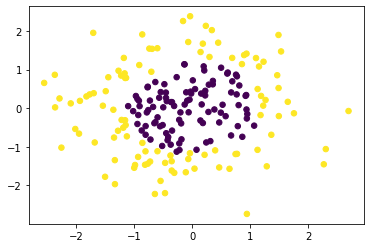

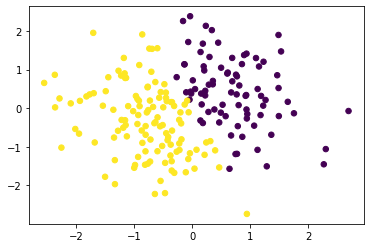

LGR accuracy - train:  0.55 , test 0.54


In [35]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

X1, y1 = make_gaussian_quantiles(n_features=2, n_classes=2,n_samples=400,random_state=0)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,train_size=0.5,random_state=0)

plt.scatter(X1_train[:, 0], X1_train[:, 1], marker="o", c=y1_train, s=30)
plt.show()

lgr = LogisticRegression()
lgr.fit(X1_train,y1_train)
y1_train_hat = lgr.predict(X1_train)
plt.scatter(X1_train[:, 0], X1_train[:, 1], marker="o", c=y1_train_hat, s=30)
plt.show()
print("LGR accuracy - train: ",lgr.score(X1_train,y1_train),", test", lgr.score(X1_test,y1_test))

# seed = 0 # this is used with the train_test_split to avoid random behaviour for this demo
# X = dataset.data
# y = dataset.target

We can see clearly that the decision boundary of the logistic regression model is very different from the true classes. 
This leads to low accuracy on the training data and on unseen test data, commonly described as **underfitting**. 

Next we use an MLP classifier, which has a nonlinear hidden layer so that it can approcimate any function within the output range, as mentioned in the last chapter. 

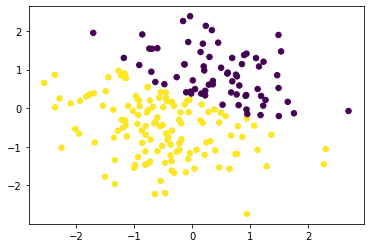

MLPC train:  0.49 , test 0.495


In [37]:
from sklearn.neural_network import MLPClassifier 

mlpc = MLPClassifier(activation='logistic',max_iter=2000,random_state=1)
mlpc.fit(X1_train,y1_train)
y1_train_hat = mlpc.predict(X1_train)
plt.scatter(X1_train[:, 0], X1_train[:, 1], marker="o", c=y1_train_hat, s=30)
plt.show()
mlpc.score(X1_train,y1_train)
print("MLPC train: ",mlpc.score(X1_train,y1_train),", test", mlpc.score(X1_test,y1_test))

The results are visually very similar to the true labels and the accuracy on both training and test data is high. 
We can conclude that MLP is a good choice. 
When running to code, you may notice that fitting the model takes a bit longer. 
This can be reduced somewhat by reducing the size of the model, but it may be necessary to invest more computation for using a more complex model. 


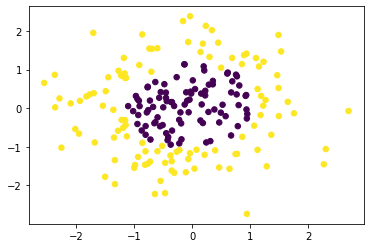

0.965
GNB train:  0.965 , test 0.995


In [38]:
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB 

gnb = GaussianNB()
gnb.fit(X1_train,y1_train)
y1_train_hat = gnb.predict(X1_train)
plt.scatter(X1_train[:, 0], X1_train[:, 1], marker="o", c=y1_train_hat, s=30)
plt.show()
print(gnb.score(X1_train,y1_train))
print("GNB train: ",gnb.score(X1_train,y1_train),", test", gnb.score(X1_test,y1_test))



### Synthetic Data Example 2

As a contrast, we will now create a dataset that is generated by a process that fits a linear model. 
We make this dataset relatively small and add some so-called label noise by changing the class label on 30% of the data using the `flip_y` parameter. 
The dataset is generated as two clusters of points, each for one class. 
A line between the  cluster centers is the ideal classification boundary, so that a linear model seems like a good choice. 

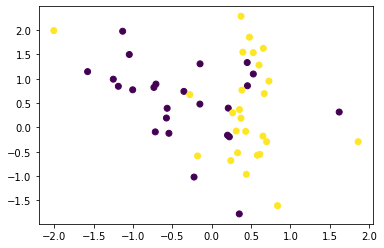

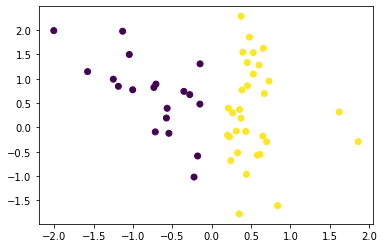

LGR train:  0.78 , test 0.7


In [39]:
from sklearn.datasets import make_classification

X2, y2 = make_classification(n_features=2, n_redundant=0, n_informative=2, class_sep=.5, flip_y=0.3,
                                         n_clusters_per_class=1,n_samples=100,random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,train_size=0.5,random_state=0)



plt.scatter(X2_train[:, 0], X2_train[:, 1], marker="o", c=y2_train)
plt.show()

#lgr = LogisticRegression(penalty='none')
lgr = LogisticRegression()
lgr.fit(X2_train,y2_train)
y2_train_hat = lgr.predict(X2_train)
plt.scatter(X2_train[:, 0], X2_train[:, 1], marker="o", c=y2_train_hat)
plt.show()
print("LGR train: ",lgr.score(X2_train,y2_train),", test", lgr.score(X2_test,y2_test))


The rsults show that the trained logistic regression model indeed separates the classes along a line that (according to visual inspection) lies between the clusters. 
The accuracy values are lower than in the last example. 
However, taking into account that 30% of the labels have been flipped, accuracy of .7 this is as good as we can expect the result to be.

For comparison we will now try a MLP classifier without regularization. 
This much more flexible model should be able to adapt well to the training data. 
The question is, what will happen with unseen data.

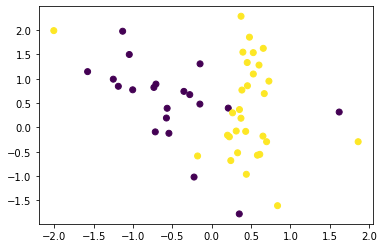

MLPC train:  0.88 , test 0.66


In [40]:
mlpc = MLPClassifier(alpha=0,max_iter=2000)
mlpc.fit(X2_train,y2_train)
y2_train_hat = mlpc.predict(X2_train)
plt.scatter(X2_train[:, 0], X2_train[:, 1], marker="o", c=y2_train_hat)
plt.show()
print("MLPC train: ",mlpc.score(X2_train,y2_train),", test", mlpc.score(X2_test,y2_test))

The results show that the model adapts very well to the training data, given that the class areas are overlapping. 
A good example is the single point on the far right with the purple lable. 
Given that the underlying process is based on one cluster per class, this point has has its label flipped with high probability. 
Therefore, the model is adapting to the label noise, which is unpredictable and should be ignored by the model. 
The is reflected in the lower accuracy on the test set.

One way to address this is by using regularization. 
The alpha parameter sets the weight of the $L_2$ regularization, which is by default set to $0.001$. With a value of $0.1$, we can expect a noticable effect. 

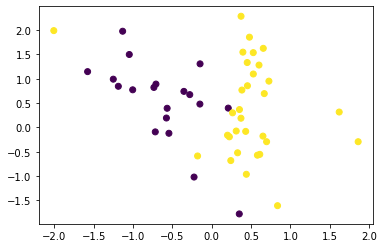

MLPC train:  0.86 , test 0.68


In [41]:
mlpc = MLPClassifier(alpha=.1,max_iter=2000,random_state=4)
mlpc.fit(X2_train,y2_train)
y2_train_hat = mlpc.predict(X2_train)
plt.scatter(X2_train[:, 0], X2_train[:, 1], marker="o", c=y2_train_hat)
plt.show()
print("MLPC train: ",mlpc.score(X2_train,y2_train),", test", mlpc.score(X2_test,y2_test))

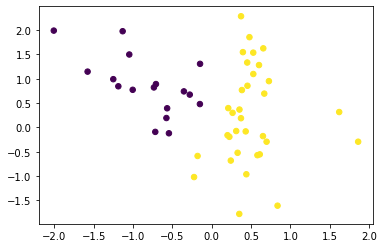

0.78
MLPC train:  0.78 , test 0.7


In [42]:
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB 

gnb = GaussianNB()
gnb.fit(X2_train,y2_train)
y2_train_hat = gnb.predict(X2_train)
plt.scatter(X2_train[:, 0], X2_train[:, 1], marker="o", c=y2_train_hat, s=30)
plt.show()
print(gnb.score(X2_train,y2_train))
print("MLPC train: ",gnb.score(X2_train,y2_train),", test", gnb.score(X2_test,y2_test))



The test accuracy is improved as expected, but still much lower than the training accuracy. Using a more complex model and performing some hyper-parameter tuning, we still have a slightly lower generalization.

### Inductive Bias and the No Free Lunch Theorem

This little experiment illustrated that the effectiveness of machine learning models depends on the nature of the data. 
If we have no prior knowledge about the data, it can indeed be shown that there is no learning algorithm that is generally better than others, which is stated in the so-called **No Free Lunch Theorem** (D. Wolpert. *The lack of a priori distinc- tions between learning algorithms*. Neural Computation 8.7 (1996), pp. 1341–1390). 

Different algorithms have different propensities and limitation in how they adapt to the data, this is called their **inductive bias**. 
If we don't know the structure of the data, we have to use experimentaton to find the most suitable models. 
However, an exhaustive search of learning models and/or feature extractions is intractable even for datasets of moderate size. 
The two main things that can help here are experience, form published literature or practitioners, and a good understanding of the task and the data. 
Prior knowledge or hypotheses about the structure of the data and an understanding of the nature of the models can be very useful in choosing good models and hyperparameters, which saves effort and computation time and leads to more robust models. 

### Machine Learning with Big Data and Deep Learning

Notwithstanding the value of prior knowledge, the most influential trend in machine learning over the last decade has been the use of deep neural networks on vast amounts of data. 
This tred has been driven by the availablity of vast amounts of data and by increased availability of computational power, particularly Graphics Processing Unites, which have been re-purposed for machine learning and more recently specialized processors for neural networks. 

The main change in approach was away from engineered features, e.g. edge detectors in computer vision, to models that learning feature extraction from raw data. 
This appraoch lead to great progress on many hard problems, including speech recognition, image analysis, and natural language processing.  
However, the fundamental problems of machine learnig are still to find or design the correct model for given task, understanding the structure of the task and using inductive biases of the models to make them efficient and robust. 

### Summary

Classification is another commong machine learning, problem (possible the most common one). In addition to the non-parametric approaches seen earlier (decision trees, k-nearest neighbour), we discussed here the most common approach of modelling class probabilities. This can be treated as a numeric optimization problem, similar to regression, with some re-formulation leading to logistic regression, based on linear regression, and neural network classification with MLPs, based on a neural network regressor. Alternatively, we can directly estimate class conditional feature distribution and apply naive Bayes classification. 

We find that the different models behave differently and we need to select and tune suitable models. 
That leads to the question whether there is a generally best or most efficient machine learning algorithm and the answer is 
There is unfortunately no general best model, and we have to use experimentation to find and validate models. 
However, using prior knowledge about the task and the data, and experience with models help in shorting the search. 
This becomes increasingly relevant with larger datasets and larger models that can be very powerful, but aso  require more time and resources to design train and validate.  

### Exercises


